In [101]:
# Importing libraries
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot  as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [102]:
# Let's generate random data

genes=['gene' + str(i) for i in range(1,101)]
wt=['wt'+ str(i) for i in range(1,6)]
ko=['ko'+ str(i) for i in range(1,6)]

In [103]:
x=[wt,ko]
x

[['wt1', 'wt2', 'wt3', 'wt4', 'wt5'], ['ko1', 'ko2', 'ko3', 'ko4', 'ko5']]

In [108]:
x=[*wt,*ko]
x

['wt1', 'wt2', 'wt3', 'wt4', 'wt5', 'ko1', 'ko2', 'ko3', 'ko4', 'ko5']

In [105]:
data=pd.DataFrame(columns=[*wt,*ko],index=genes)

In [109]:
data.head()

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
data.index

Index(['gene1', 'gene2', 'gene3', 'gene4', 'gene5', 'gene6', 'gene7', 'gene8',
       'gene9', 'gene10', 'gene11', 'gene12', 'gene13', 'gene14', 'gene15',
       'gene16', 'gene17', 'gene18', 'gene19', 'gene20', 'gene21', 'gene22',
       'gene23', 'gene24', 'gene25', 'gene26', 'gene27', 'gene28', 'gene29',
       'gene30', 'gene31', 'gene32', 'gene33', 'gene34', 'gene35', 'gene36',
       'gene37', 'gene38', 'gene39', 'gene40', 'gene41', 'gene42', 'gene43',
       'gene44', 'gene45', 'gene46', 'gene47', 'gene48', 'gene49', 'gene50',
       'gene51', 'gene52', 'gene53', 'gene54', 'gene55', 'gene56', 'gene57',
       'gene58', 'gene59', 'gene60', 'gene61', 'gene62', 'gene63', 'gene64',
       'gene65', 'gene66', 'gene67', 'gene68', 'gene69', 'gene70', 'gene71',
       'gene72', 'gene73', 'gene74', 'gene75', 'gene76', 'gene77', 'gene78',
       'gene79', 'gene80', 'gene81', 'gene82', 'gene83', 'gene84', 'gene85',
       'gene86', 'gene87', 'gene88', 'gene89', 'gene90', 'gene91', 'gene92'

In [111]:
data.loc['gene1','wt1':'wt5']

wt1    NaN
wt2    NaN
wt3    NaN
wt4    NaN
wt5    NaN
Name: gene1, dtype: object

In [112]:
data.loc['gene1','ko1':'ko5']

ko1    NaN
ko2    NaN
ko3    NaN
ko4    NaN
ko5    NaN
Name: gene1, dtype: object

In [113]:
for gene in data.index:
    data.loc[gene,'wt1':'wt5']=np.random.poisson(lam=rd.randrange(10,1000),size=5)
    data.loc[gene,'ko1':'ko5']=np.random.poisson(lam=rd.randrange(10,1000),size=5)
    

In [114]:
data.head()

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,712,653,634,685,664,716,745,690,708,730
gene2,348,366,383,359,384,133,142,147,140,137
gene3,204,183,235,189,209,503,493,513,491,485
gene4,950,915,915,907,898,6,7,3,6,12
gene5,261,207,244,243,267,875,905,893,883,880


In [115]:
data.shape

(100, 10)

In [119]:
scaled_data=preprocessing.scale(data.T) # Notice that we are passing in the transpose of our data. The SCALE function expects 
# the smaples to be rows instead of columns. and the data returned will be an ARRAY instead of DATA FRAME   
data.T.head(10) # every row is scaled and then inverted back

,gene1,gene2,gene3,gene4,gene5,gene6,gene7,gene8,gene9,gene10,...,gene91,gene92,gene93,gene94,gene95,gene96,gene97,gene98,gene99,gene100
wt1,712,348,204,950,261,742,90,714,551,610,...,232,563,65,60,285,802,822,868,903,715
wt2,653,366,183,915,207,728,73,686,591,653,...,262,628,66,64,268,741,775,916,893,723
wt3,634,383,235,915,244,741,73,754,578,641,...,239,599,70,59,301,778,787,905,925,692
wt4,685,359,189,907,243,720,97,727,554,647,...,247,599,71,61,295,767,816,862,932,737
wt5,664,384,209,898,267,712,91,711,569,708,...,245,579,65,53,308,778,801,909,990,708
ko1,716,133,503,6,875,174,231,411,117,648,...,717,548,512,505,827,986,410,717,740,569
ko2,745,142,493,7,905,188,223,358,98,733,...,718,513,539,463,858,963,477,644,739,581
ko3,690,147,513,3,893,188,272,362,104,613,...,683,533,488,496,854,1051,491,676,737,574
ko4,708,140,491,6,883,160,244,366,107,688,...,701,551,486,532,862,1010,462,699,778,554
ko5,730,137,485,12,880,174,238,348,123,682,...,663,534,486,486,841,1024,482,723,739,536


In [117]:
type(scaled_data)

numpy.ndarray

In [123]:
scaled_data.shape # each sample is in transposed form of the data frame

(10, 100)

In [120]:
scaled_data

array([[ 0.54735249,  0.82132552, -0.99505148,  1.0720973 , -0.94708839,
         1.04772081, -0.9196125 ,  0.96716085,  0.9219476 , -1.38399992,
         1.13310758, -1.03894733,  0.81874051, -0.9888232 , -1.04225505,
        -0.9934513 ,  1.2741079 ,  0.04967663,  1.01222179, -0.70813719,
         0.98688206, -1.20805499, -0.74544354,  0.51682072, -1.24096697,
         0.98648836,  1.02012445,  1.00652691,  0.92684095, -1.23521618,
         0.61624084,  0.95824843,  1.19559553, -1.13715586, -1.09721053,
         1.22715667, -0.96449697, -1.12532006, -0.93840753, -0.32061673,
        -0.54091789,  0.79384531,  1.08234986,  0.56210231,  1.01756947,
        -1.28640957, -1.07252061, -1.01374718,  0.95405761, -0.92663777,
         1.07117611,  1.25895836, -1.01867997, -0.88178954,  0.86562694,
         1.01391957,  0.88560222, -0.99119602, -0.98990357, -0.97488153,
         1.07580295,  1.02530404,  1.32900928,  0.9721158 ,  0.87660398,
         1.01690311, -0.46951295, -1.00508254,  0.8

In [78]:
# we could have also done SCALING using StandardScaler().fit_transform(data.T)

# This method is most commonly used for Machine Learning, and that's what SKLEARN is designed to do

In [79]:
# Let's now create a PCA Object
# Rather than just have a function that does PCA and returns results, sklearn uses objects that can be trained using one data set and applied to other data set

In [127]:
pca=PCA()
pca.fit(scaled_data) # This is where we do all of the PCA math(calculate LOADING scores and the variation each principle component accounts for)
pca_data=pca.transform(scaled_data) # this is where where generate coordinates for PCA graph based on the LOADING scores and the SCALED data

In [130]:
pca.explained_variance_ratio_

array([9.32221301e-01, 1.83739153e-02, 1.40594962e-02, 1.17456750e-02,
       8.93347720e-03, 5.56519985e-03, 3.94381986e-03, 2.94482011e-03,
       2.21229550e-03, 3.28684485e-33])

In [84]:
# Let's draw SCREE plot, to see how many principal components should go into the final plot

# The first thing we do,is calculate the percentage of variation that each prinicipal component accounts for 

per_var=np.round(pca.explained_variance_ratio_*100,decimals=1)
labels=['PC'+str(i)for i in range(1,len(per_var)+1)]

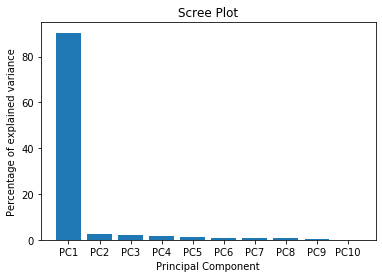

In [133]:
# let's use matplotlib to create a BAR plot
plt.bar(x=range(1,len(per_var)+1),height=per_var,tick_label=labels)
plt.ylabel('Percentage of explained variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

Almost all of the variation is along the first PC, so a 2-D graph, using PC1 and PC2, should do good job representing the original data

To draw a PCA plot, we will first put the new co-ordiantes, created by pca.tansform(scaled_data), into a nice matrix where rows 
have sample labels and the columns have PC labels

In [135]:
pca_data.shape

(10, 10)

In [88]:
pca_df=pd.DataFrame(pca_data,index=[*wt,*ko],columns=labels)

In [89]:
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
wt1,-9.545748,1.432231,2.807454,0.138277,-0.469529,-0.680625,-0.645468,-0.017310,0.820389,4.080070e-15
wt2,-9.438324,-0.663593,0.608611,-0.493176,2.665655,0.003364,0.150709,0.633568,-0.474169,2.581269e-15
wt3,-9.403631,3.021160,-2.134376,-0.174116,-0.236556,-0.103815,-0.332086,-0.681663,-0.579824,2.553513e-15
wt4,-9.701729,-2.306515,0.231994,-0.577260,-0.674834,0.474210,1.060710,-1.314672,0.078188,3.330669e-15
wt5,-9.455268,-1.398928,-1.533425,1.098524,-1.272584,0.326826,-0.202746,1.412316,0.160541,2.664535e-15
ko1,9.459664,-0.663893,-2.009459,-0.898871,0.944584,-0.305737,-0.625344,-0.307101,1.121875,-4.662937e-15
ko2,9.165332,-1.716082,0.699277,-0.290672,-0.678199,-0.991943,-1.248022,-0.237401,-0.930689,-9.992007e-16
ko3,9.646949,0.858653,0.978804,-0.607313,-0.239491,2.398936,-0.305768,0.182520,-0.105944,-9.992007e-16
ko4,9.759681,1.091844,0.168073,-1.326999,-0.667370,-0.986268,1.546787,0.758315,-0.084572,-4.378442e-15
ko5,9.513073,0.345124,0.183047,3.131607,0.628324,-0.134949,0.601226,-0.428573,-0.005794,-2.747802e-15


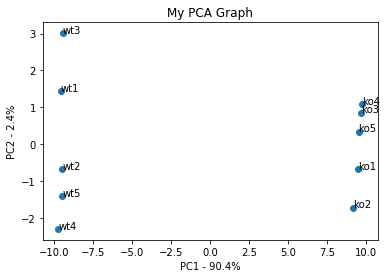

In [91]:
# let's draw the sactter plot
plt.scatter(pca_df.PC1,pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

# this loop adds sample names to the graph
for sample in pca_df.index:
    plt.annotate(sample,(pca_df.PC1.loc[sample],pca_df.PC2.loc[sample]))
    
plt.show()

The wt samples clustered on the left side, suggesting that they are correlated with each other

The ko samples clustered on the left side, suggesting that they are correlated with each other

And the separation of the two clusters along the x-axis suggests that "wt" samples are very different from "ko" samples

Lastly,let's look at the loading scores for PC1, to determine which genes had the largest influence on separating the two clusters along the x-axis

We'll start by creating pandas Series object withy loading scores in PC1

* Note: The PCs are zero-indexed, so PC1=0

In [136]:
pca.components_

array([[ 7.61584953e-02, -1.03212485e-01,  1.02927910e-01,
        -1.03463619e-01,  1.03463242e-01, -1.03399889e-01,
         1.01962997e-01, -1.02837174e-01, -1.03487954e-01,
         2.93096991e-02, -1.02333584e-01,  1.03324850e-01,
        -1.01848836e-01,  1.03474799e-01,  1.03320125e-01,
         1.03414682e-01, -9.72645469e-02,  8.05629072e-02,
        -1.03215955e-01,  1.01081821e-01, -1.03379511e-01,
         1.02603324e-01,  6.97110337e-02, -1.00017785e-01,
         1.02443782e-01, -1.01540624e-01, -1.03287431e-01,
        -1.03022541e-01, -1.03412611e-01,  9.83004887e-02,
        -9.80131745e-02, -1.03269115e-01, -1.02880368e-01,
         1.02748238e-01,  1.03196986e-01, -1.02777394e-01,
         1.03287627e-01,  1.02656803e-01,  1.02130751e-01,
        -4.95206906e-02,  9.84051885e-02, -1.02505329e-01,
        -1.03387287e-01, -1.01056694e-01, -1.03223961e-01,
         1.01979719e-01,  1.00065922e-01,  1.03429187e-01,
        -1.03217451e-01,  1.02898324e-01, -1.03357392e-0

In [94]:
loading_scores=pd.Series(pca.components_[0],index=genes)

In [137]:
loading_scores

gene1     -0.100578
gene2      0.104712
gene3      0.105072
gene4     -0.104201
gene5      0.104867
             ...   
gene96    -0.102582
gene97     0.061574
gene98    -0.104202
gene99     0.099751
gene100    0.105098
Length: 100, dtype: float64

In [98]:
# Now we will sort the loading scores based on their magnitude(absolute value)
sorted_loading_scores=loading_scores.abs().sort_values(ascending=False)

In [99]:
top_10_genes=sorted_loading_scores[0:10].index.values

In [100]:
print(loading_scores[top_10_genes])

gene47    -0.105138
gene100    0.105098
gene44     0.105079
gene50    -0.105072
gene3      0.105072
gene67     0.105066
gene20    -0.105049
gene81     0.105043
gene94    -0.105034
gene7     -0.105032
dtype: float64
